# Weekly project 6
Today we will continue work from monday.
We will follow the style of last week.

Weekly project:
- You will need to implement your own k-means algorithm. You are not allowed to use the implementation in `sklearn`.
- It should be able to cluster each of the different figures.
- Extend your k-means so it finds the optimal amount of clusters.
  
## Challenge
- Implement the mean shift clustering algorithm


In [4]:
import numpy as np
import open3d as o3d
import copy
import matplotlib.pyplot as plt

def draw_labels_on_model(pcl, labels):
    cmap = plt.get_cmap("tab20")
    pcl_temp = copy.deepcopy(pcl)
    max_label = labels.max()
    colors = cmap(labels / (max_label if max_label > 0 else 1))
    colors[labels < 0] = 0
    pcl_temp.colors = o3d.utility.Vector3dVector(colors[:, :3])
    o3d.visualization.draw_geometries([pcl_temp])

d = 4
mesh = o3d.geometry.TriangleMesh.create_tetrahedron().translate((-d, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_octahedron().translate((0, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_icosahedron().translate((d, 0, 0))
mesh += o3d.geometry.TriangleMesh.create_torus().translate((-d, -d, 0))
mesh += o3d.geometry.TriangleMesh.create_mobius(twists=1).translate((0, -d, 0))
mesh += o3d.geometry.TriangleMesh.create_mobius(twists=2).translate((d, -d, 0))

## apply k means on this
point_cloud = mesh.sample_points_uniformly(int(1e3))

o3d.visualization.draw_geometries([point_cloud])


In [16]:
def kmeans(points, k, max_iterations=1000):
    """Your implementation goes here

    Args:
    Replace the arguments by what you think is necessary.
        
        arg1 (_type_): _description_
        arg2 (_type_): _description_
    """
    # start with randomly init centroids
    centroids = points[np.random.choice(points.shape[0], k, replace=False), :]

    for i in range(max_iterations):
        # Sum of Squared Euclidean Distances (Distortion)
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # get new centroids
        for j in range(k):
            centroids[j, :] = points[labels == j, :].mean(axis=0)

    return labels



num_clusters = 6
points = np.asarray(point_cloud.points)
labels = kmeans(points, 6, 5000)

draw_labels_on_model(point_cloud, labels)

In [6]:
o3d.visualization.draw_geometries([point_cloud])
print(np.asarray(point_cloud.points))

[[-4.19964891e+00  5.14144172e-01 -3.33333333e-01]
 [-3.35174510e+00 -4.00305183e-02 -3.33333333e-01]
 [-4.12573443e+00 -8.31798091e-02 -3.33333333e-01]
 ...
 [ 5.44557093e+00 -4.30487242e+00 -1.00572068e-01]
 [ 5.28010905e+00 -4.13095968e+00 -2.96138004e-02]
 [ 5.19174682e+00 -4.00139077e+00 -1.73933264e-04]]


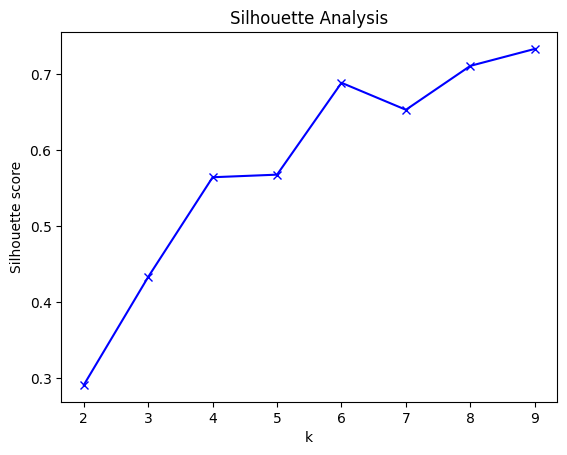

7


In [22]:
# implement silhouette method to findoptimal amount of clusters

def compute_silhouette_score(X, k, labels):
    distances = np.sqrt(((X[:, np.newaxis, :] - X) ** 2).sum(axis=2))
    a = np.zeros(X.shape[0])
    for i in range(k):
        mask = labels == i
        if mask.any():
            a[mask] = np.mean(distances[mask][:, mask], axis=1)

    b = np.zeros(X.shape[0])
    for i in range(k):
        mask_i = labels == i  
        if mask_i.any():
            mask_not_i = np.logical_not(mask_i)
            b_i = np.mean(distances[mask_i][:, mask_not_i], axis=1)
            b[mask_i] = np.min(b_i)
    s = (b - a) / np.maximum(a, b)
    silhouette_score = np.mean(s)
    return silhouette_score

def kmeans_silhouette():
    k_values = range(2, 10)
    silhouette_scores = []

    for k in k_values:
        labels = kmeans(points, k, 1000)
        silhouette_scores.append(compute_silhouette_score(points, k, labels))

    # Plot the average silhouette score against the number of clusters
    plt.plot(k_values, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Analysis')
    plt.show()
    return np.array(silhouette_scores).argmax()

kmax = kmeans_silhouette()
print(kmax)
points = np.asarray(point_cloud.points)
labels = kmeans(points, kmax, 5000)

draw_labels_on_model(point_cloud, labels)

In [ ]:
# MEAN SHIFT ALGORITHM 
